# Demo : No pattern found

Author: Jim Xie

Date:   2020-08-07

In [14]:
# -*- coding: utf-8 -*- 
import sys,os
import numpy as np
import random
from matplotlib import pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
import math
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from numpy.random import RandomState
np.set_printoptions(suppress=True)
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier,ExtraTreesClassifier, BaggingClassifier  
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis, LinearDiscriminantAnalysis
from xgboost import XGBClassifier
sns.set(font_scale=2)
from warnings import filterwarnings
filterwarnings('ignore')

In [15]:
g_classifiers = [
    ('Logistic Regression', LogisticRegression()), 
    ('Nearest Neighbors', KNeighborsClassifier(3)),  
    ('Linear SVM', SVC(kernel='linear', C=0.025)),
    ('RBF SVM', SVC(gamma=2, C=1)),
    ('Gaussian Process', GaussianProcessClassifier(1.0 * RBF(1.0))),  
    ('Decision Tree', DecisionTreeClassifier(max_depth=5)),  
    ('Random Forest', RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1)), 
    ('AdaBoost', AdaBoostClassifier()),  
    ('Extra Trees', ExtraTreesClassifier()),
    ('GradientBoosting', GradientBoostingClassifier()),  
    ('Bagging', BaggingClassifier()),
    ('Naive Bayes', GaussianNB()),  
    ('QDA', QuadraticDiscriminantAnalysis()),  
    ('LDA', LinearDiscriminantAnalysis()),  
    ('MLP', MLPClassifier(alpha=1)),
    ('XGB', XGBClassifier()),
]

In [16]:
def GetParityData():
    dataset_size = 100
    x1 = np.random.random_integers(1,500,dataset_size )
    y = []
    x = []
    for t1 in x1:
        if (t1)%2 == 0:
            y.append([1])
            x.append([t1])
        else:
            x.append([t1])
            y.append([0])
    return np.array(x),np.array(y)

def GetParityDataEx():
    dataset_size = 100
    x1 = np.random.random_integers(1,500,dataset_size )
    y = []
    x = []
    for t1 in x1:
        if (t1)%2 == 0:
            y.append([1])
            x.append([t1])
        else:
            x.append([-t1])
            y.append([-1])
    return np.array(x),np.array(y)

# Learning from original data ( bad data distribution )

In [17]:
raw_x,raw_y = GetParityData()
test_x,test_y = GetParityData()

Text(0, 0.5, 'X')

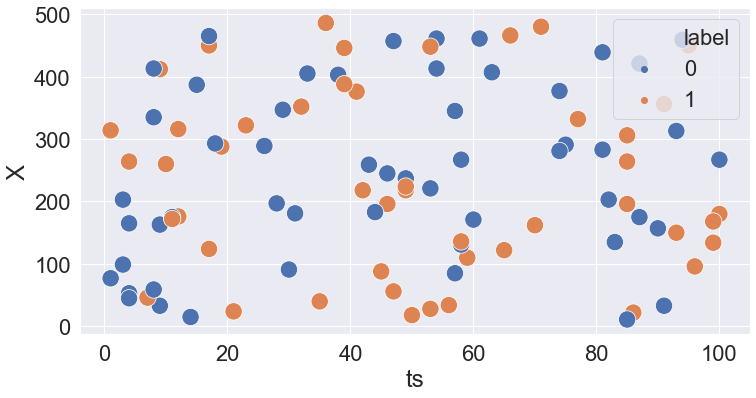

In [20]:
df = pd.DataFrame(raw_x)
df['label'] = raw_y
df['ts'] = np.random.random_integers(1,100,len(raw_y) )
plt.style.use({'figure.figsize':(12, 6)})
ax = sns.scatterplot(x="ts", y=0, data=df,hue='label',s=300)
ax.ticklabel_format(style='plain',axis='both')
plt.xlabel('ts',fontsize=24)
plt.ylabel('X',fontsize=24)

<AxesSubplot:xlabel='1', ylabel='0'>

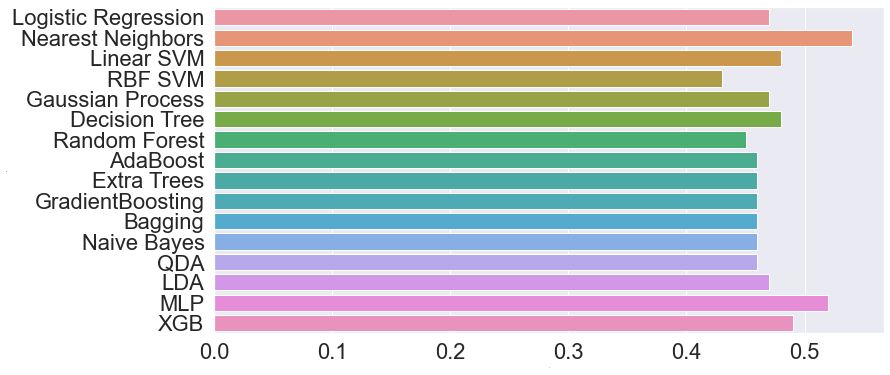

In [6]:
result = []
models = {}
for name, clf in g_classifiers:
    clf.fit(raw_x, raw_y)
    score = clf.score(test_x,test_y)
    result.append((name,score))
    models[name] = clf
df = pd.DataFrame(result)
plt.xlabel('Classifier',fontsize=2)
plt.ylabel('Accuracy',fontsize=2)
sns.barplot(y=0, x=1, data=df)

In [7]:
input_x = [[112],[244]]
input_x = np.random.random_integers(500,1000,20)
input_x=input_x[:,np.newaxis]
pred_x = np.array(input_x)
pred_y = models['LDA'].predict(pred_x)
for x,y in zip(input_x,pred_y):
    if y == 1:
        print(" %d --> Even" %x[0])
    else:
        print(" %d --> Odd" %x[0])

 776 --> Even
 809 --> Even
 657 --> Even
 914 --> Even
 818 --> Even
 887 --> Even
 671 --> Even
 901 --> Even
 866 --> Even
 716 --> Even
 601 --> Even
 929 --> Even
 796 --> Even
 798 --> Even
 669 --> Even
 712 --> Even
 886 --> Even
 725 --> Even
 655 --> Even
 638 --> Even


# Method from internet

In [8]:
extern_raw_x,extern_raw_y = GetParityData()
verify_x,verify_y = GetParityData()
def digital2bin(x):
    a = format(x, '032b')
    l = list(str(a))
    l = np.array(list(map(int, l)))
    return l

train_x = []
train_y = []
for item,label in zip(extern_raw_x,extern_raw_y):
    a = item[0]
    b = digital2bin(a )
    train_x.append(b)
    train_y.append(label)

train_x = np.array(train_x)
train_y = np.array(train_y)

test_x = []
test_y = []
for item,label in zip(verify_x,verify_y):
    a = item[0]
    b = digital2bin(a )
    test_x.append(b)
    test_y.append(label)
test_x = np.array(test_x)
test_y = np.array(test_y)

<AxesSubplot:xlabel='1', ylabel='0'>

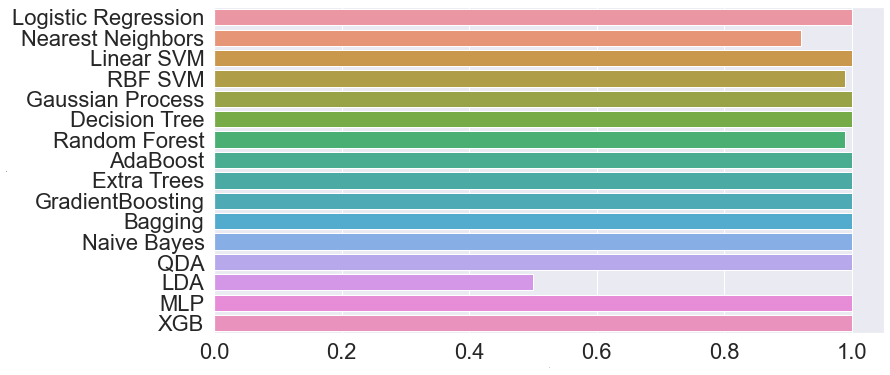

In [9]:
result = []
models = {}
for name, clf in g_classifiers:
    clf.fit(train_x, train_y)
    score = clf.score(test_x, test_y)
    result.append((name,score))
    models[name] = clf
df = pd.DataFrame(result)
plt.xlabel('Classifier',fontsize=2)
plt.ylabel('Accuracy',fontsize=2)
sns.barplot(y=0, x=1, data=df)

In [10]:
pred_y = models['XGB'].predict(test_x)
for x,y in zip(test_x,pred_y):
    if y == 1:
        print(" %s --> Even" %x)
    else:
        print(" %s --> Odd" %x)

 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1] --> Odd
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1] --> Odd
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1] --> Odd
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 1 0 1] --> Odd
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 1 1] --> Odd
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 1 1 0] --> Even
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 1] --> Odd
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0] --> Even
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1 1 1 0] --> Even
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 1 1 1] --> Odd
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0] --> Even
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1 1 1] --> Odd
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 1 1 0] --> Even
 [0 0 0 0 0 0 0 0 0 

# Learning from good data distribution

In [11]:
trans_raw_x,trans_raw_y = GetParityDataEx()
trans_test_x,trans_test_y = GetParityDataEx()

Text(0, 0.5, 'X')

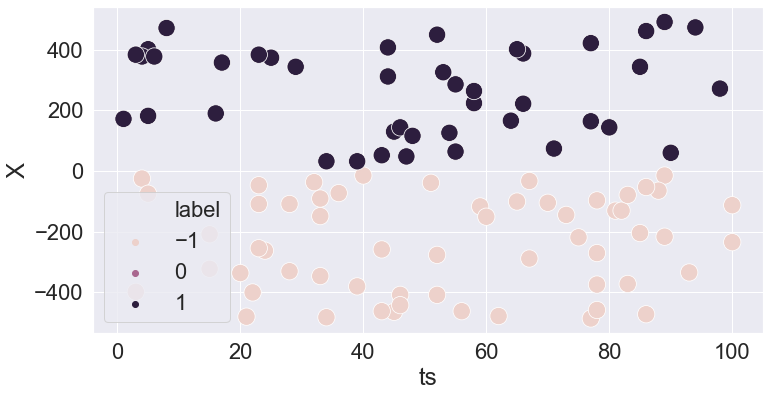

In [12]:
df = pd.DataFrame(trans_raw_x)
df['label'] = trans_raw_y
df['ts'] = np.random.random_integers(1,100,len(raw_y) )
plt.style.use({'figure.figsize':(12, 6)})
ax = sns.scatterplot(x='ts', y=0, data=df,hue='label',s=300)
ax.ticklabel_format(style='plain',axis='both')
plt.xlabel('ts',fontsize=24)
plt.ylabel('X',fontsize=24)

<AxesSubplot:xlabel='1', ylabel='0'>

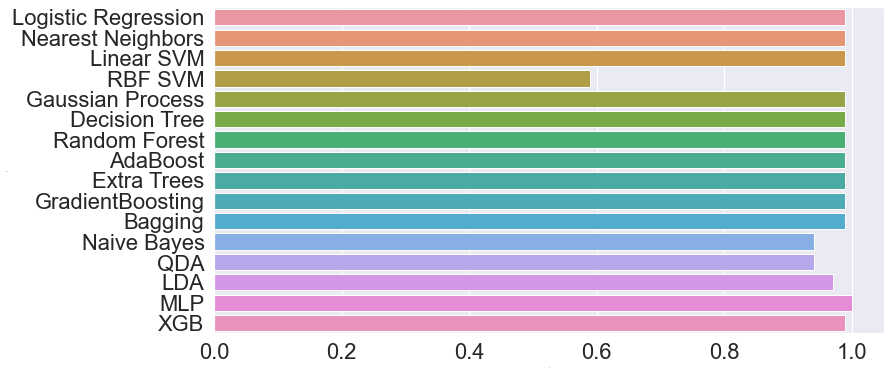

In [13]:
result = []
for name, clf in g_classifiers:
    clf.fit(trans_raw_x, trans_raw_y)
    score = clf.score(trans_test_x, trans_test_y)
    result.append((name,score))
df = pd.DataFrame(result)
plt.xlabel('Classifier',fontsize=2)
plt.ylabel('Accuracy',fontsize=2)
sns.barplot(y=0, x=1, data=df)